## Drifter Velocity Period Notebook

### Introduction
This notebook focuses on the computation of the oscillation period of drifters' velocity

### Data Sources
- Drifter Data:
  - Source: NOAA
  - Collection Frequency: Every 6 hours
  - Total Number of Drifters: 221

## Import Library

In [2]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
from cartopy import config
import matplotlib.animation

## Read Drifter Data

In [3]:
fn='./drifter_6hour_qc_893c_d15d_c4b7_U1711967648742.nc';
ds=xr.open_dataset(fn);
ds

<xarray.Dataset>
Dimensions:    (row: 78383)
Dimensions without coordinates: row
Data variables:
    time       (row) datetime64[ns] ...
    latitude   (row) float64 ...
    longitude  (row) float64 ...
    sst        (row) float64 ...
    ve         (row) float64 ...
    vn         (row) float64 ...
Attributes: (12/54)
    acknowledgement:            Lumpkin, Rick; Centurioni, Luca (2019). Globa...
    cdm_data_type:              Trajectory
    cdm_trajectory_variables:   ID
    comment:                    Global Drifter Program 6h data
    contributor_name:           NOAA Global Drifter Program
    contributor_role:           Data Acquisition Center
    ...                         ...
    summary:                    Global Drifter Program 6-hourly drifting buoy...
    time_coverage_end:          2023-10-14T18:00:00Z
    time_coverage_start:        2023-01-01T00:00:00Z
    title:                      Global Drifter Program - 6 Hour Interpolated ...
    Westernmost_Easting:        -70.0
    wmo_platform_code:          4600620

## Extract Coordinates and Variables

In [4]:
ve_curr = ds.ve.values
vn_curr = ds.vn.values
sst = ds.sst.values
lon = ds.longitude.values
lat = ds.latitude.values
time = ds.time.values

## Creation of Pandas Array for Drifter Data

In [5]:
data = {
    'Longitude': lon,
    'Latitude' : lat,
    'time'     : time,
    've'       : ve_curr,
    'vn'       : vn_curr,
    'sst'      : sst
}

df = pd.DataFrame(data)
df

,Longitude,Latitude,time,ve,vn,sst
0,-14.478,-18.548,2023-01-01 00:00:00,-0.13760,-0.07635,23.612
1,-14.499,-18.556,2023-01-01 06:00:00,-0.09969,0.01322,23.564
2,-14.519,-18.543,2023-01-01 12:00:00,-0.15719,0.08193,23.699
3,-14.563,-18.524,2023-01-01 18:00:00,-0.26155,0.03533,23.856
4,-14.626,-18.529,2023-01-02 00:00:00,-0.23922,-0.07837,23.717
...,...,...,...,...,...,...
78378,-22.006,-19.946,2023-06-11 12:00:00,-0.03853,-0.05076,25.189
78379,-22.013,-19.961,2023-06-11 18:00:00,-0.05150,-0.06262,25.179
78380,-22.027,-19.971,2023-06-12 00:00:00,-0.06030,-0.04773,25.133
78381,-22.038,-19.980,2023-06-12 06:00:00,-0.06036,-0.05688,25.093


## Selecting Drifter Data

In [7]:
# Test: Our selected drifter has 1102 observations. 
df_1 = df[0:1102] 
df_1

,Longitude,Latitude,time,ve,vn,sst
0,-14.478,-18.548,2023-01-01 00:00:00,-0.13760,-0.07635,23.612
1,-14.499,-18.556,2023-01-01 06:00:00,-0.09969,0.01322,23.564
2,-14.519,-18.543,2023-01-01 12:00:00,-0.15719,0.08193,23.699
3,-14.563,-18.524,2023-01-01 18:00:00,-0.26155,0.03533,23.856
4,-14.626,-18.529,2023-01-02 00:00:00,-0.23922,-0.07837,23.717
...,...,...,...,...,...,...
1097,-37.029,-19.641,2023-10-02 06:00:00,-0.04350,-0.23175,25.453
1098,-37.031,-19.684,2023-10-02 12:00:00,-0.03533,-0.25535,25.527
1099,-37.044,-19.740,2023-10-02 18:00:00,0.00391,-0.27071,25.628
1100,-37.029,-19.790,2023-10-03 00:00:00,-0.08392,-0.33392,25.594


## Let's plot the trajectory of our drifter



## Case of ve

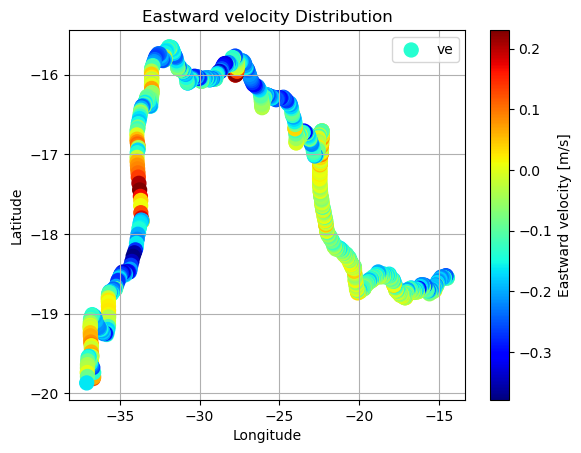

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame with longitude, latitude, temperature, and time
# Replace this with your actual DataFrame
df_1 = df[0:1102]

# Convertir la colonne temps en un format numérique représentant le temps écoulé (en secondes)
df_1['time'] = (df_1['time'] - df_1['time'].iloc[0]).dt.total_seconds()

# Tracer la force inertielle en 2D
plt.scatter(df_1['Longitude'], df_1['Latitude'], c=df_1['ve'], cmap='jet', s=100)
 
plt.colorbar(label='Eastward velocity [m/s]')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Eastward velocity Distribution')
# Add grid
plt.grid(True)
plt.legend(['ve'])
plt.savefig("fig19 mode.png")
plt.show()

## Case of vn

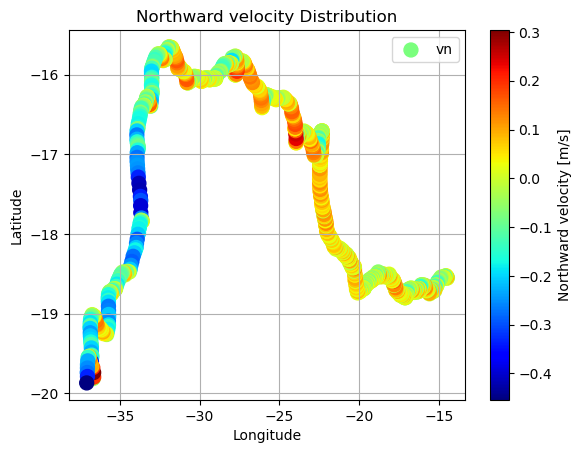

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame with longitude, latitude, temperature, and time
# Replace this with your actual DataFrame
df_1 = df[0:1102]

# Convertir la colonne temps en un format numérique représentant le temps écoulé (en secondes)
df_1['time'] = (df_1['time'] - df_1['time'].iloc[0]).dt.total_seconds()

# Tracer la force inertielle en 2D
plt.scatter(df_1['Longitude'], df_1['Latitude'], c=df_1['vn'], cmap='jet', s=100)
 
plt.colorbar(label='Northward velocity [m/s]')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Northward velocity Distribution')
# Add grid
plt.grid(True)
plt.legend(['vn'])
plt.savefig("fig20 mode.png")
plt.show()

## Time Series of Eastward (ve) and Northward (vn) Velocity for Our Drifter 

## Case of ve

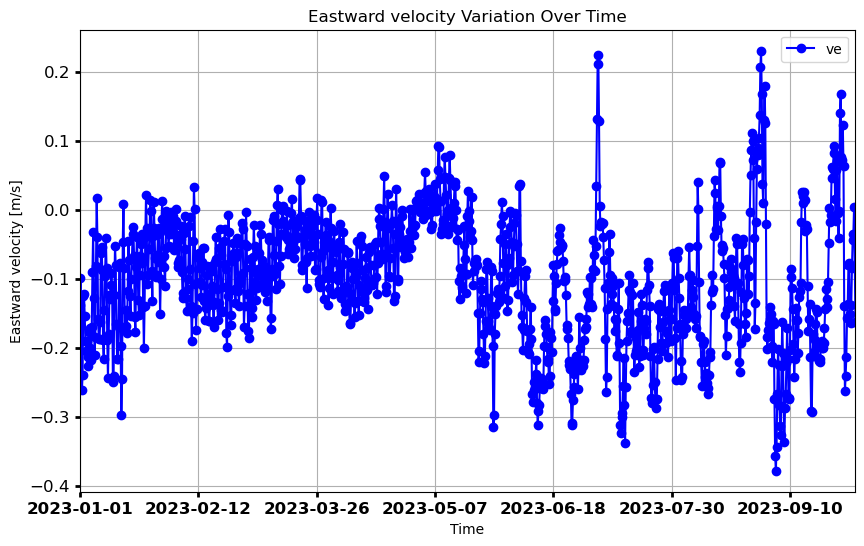

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with 'time' and 've' columns
df_1 = df[0:1102]
# Step 1: Plotting
plt.figure(figsize=(10, 6))

# Plot ve as a function of time
plt.plot(df_1['time'], df_1['ve'], color='b', marker='o', linestyle='-')

# Add axis labels and title
plt.legend(['ve'])
plt.xlabel('Time')
plt.ylabel('Eastward velocity [m/s]')
plt.title('Eastward velocity Variation Over Time')

# Add grid
plt.grid(True)

# Set font size and font weight directly on the Axes object
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=12, width=2)
for label in ax.get_xticklabels():
    label.set_fontweight('bold')

# Set x-axis limits and tick labels
ax.set_xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2023-10-03'))
ax.set_xticks(pd.date_range(start='2023-01-01', end='2023-10-03', freq='1008H'))
ax.set_xticklabels(pd.date_range(start='2023-01-01', end='2023-10-03', freq='1008H').strftime('%Y-%m-%d'), rotation=0)

# plt.fill_between([start_date, end_date], ymin, ymax, color='green', alpha=0.3)
plt.savefig("fig21 mode.png")
plt.show()

# Show plot
plt.show()

## Case of vn

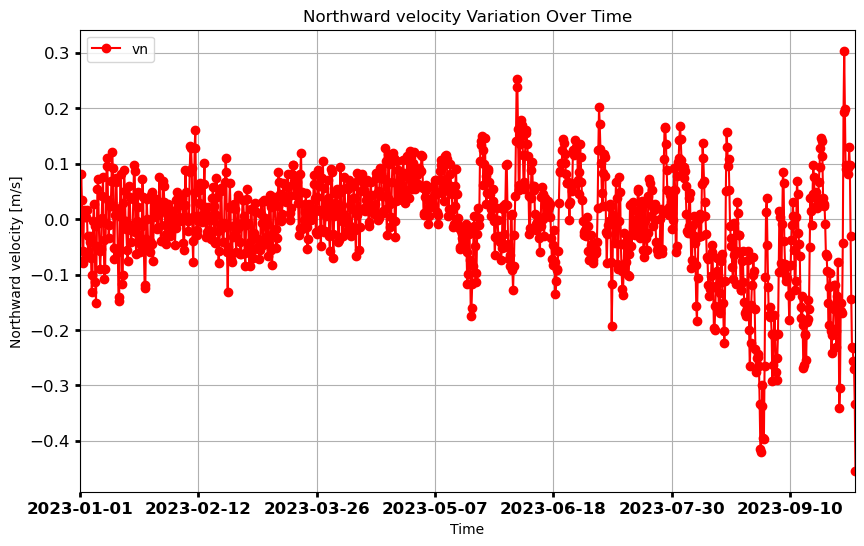

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with 'time' and 've' columns
df_1 = df[0:1102]
# Step 1: Plotting
plt.figure(figsize=(10, 6))

# Plot ve as a function of time
plt.plot(df_1['time'], df_1['vn'], color='red', marker='o', linestyle='-')

# Add axis labels and title
plt.legend(['vn'])
plt.xlabel('Time')
plt.ylabel('Northward velocity [m/s]')
plt.title('Northward velocity Variation Over Time')

# Add grid
plt.grid(True)

# Set font size and font weight directly on the Axes object
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=12, width=2)
for label in ax.get_xticklabels():
    label.set_fontweight('bold')

# Set x-axis limits and tick labels
ax.set_xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2023-10-03'))
ax.set_xticks(pd.date_range(start='2023-01-01', end='2023-10-03', freq='1008H'))
ax.set_xticklabels(pd.date_range(start='2023-01-01', end='2023-10-03', freq='1008H').strftime('%Y-%m-%d'), rotation=0)

# plt.fill_between([start_date, end_date], ymin, ymax, color='green', alpha=0.3)
plt.savefig("fig22 mode.png")
plt.show()

# Show plot
plt.show()

## We will detrend time series using mirror effect at the boundaries

## Case of ve

In [49]:
import pandas as pd
# Making them periodic at the boundaries.
# Convertir votre tableau numpy en DataFrame pandas si ce n'est pas déjà le cas
df_1 =  df[0:1102]

# Étape 1 : Détection de la tendance
df_1['tendance'] = df_1['ve'].rolling(window=12).mean()

# Étape 2 : Suppression des composantes saisonnières
df_1['detrended'] = df_1['ve'] - df_1['tendance']

# Étape 3 : Application de l'effet miroir aux frontières
# Dupliquer les données en inversant les temps
df_1_mirror = df_1.copy()
df_1_mirror['time'] = df_1_mirror['time'].apply(lambda x: x - (x - df_1['time'].min()) * 2)

# Concaténer le DataFrame original et son miroir
df_1_extended = pd.concat([df_1, df_1_mirror], ignore_index=True)

# Trier par temps
df_1_extended.sort_values(by='time', inplace=True)

# Étape 4 : Interpolation ou extrapolation (non implémenté ici)

# Étape 5 : Validation (non implémenté ici)

# Affichage des données étendues avec effet miroir
print(df_1_extended)

      Longitude  Latitude                time       ve       vn     sst  \
2203    -37.078   -19.871 2022-03-31 18:00:00 -0.16258 -0.45400  25.566   
2202    -37.029   -19.790 2022-04-01 00:00:00 -0.08392 -0.33392  25.594   
2201    -37.044   -19.740 2022-04-01 06:00:00  0.00391 -0.27071  25.628   
2200    -37.031   -19.684 2022-04-01 12:00:00 -0.03533 -0.25535  25.527   
2199    -37.029   -19.641 2022-04-01 18:00:00 -0.04350 -0.23175  25.453   
...         ...       ...                 ...      ...      ...     ...   
1097    -37.029   -19.641 2023-10-02 06:00:00 -0.04350 -0.23175  25.453   
1098    -37.031   -19.684 2023-10-02 12:00:00 -0.03533 -0.25535  25.527   
1099    -37.044   -19.740 2023-10-02 18:00:00  0.00391 -0.27071  25.628   
1100    -37.029   -19.790 2023-10-03 00:00:00 -0.08392 -0.33392  25.594   
1101    -37.078   -19.871 2023-10-03 06:00:00 -0.16258 -0.45400  25.566   

      tendance  detrended  
2203 -0.096162  -0.066418  
2202 -0.095739   0.011819  
2201 -0.106552 

## Case of vn

In [52]:
import pandas as pd
# Making them periodic at the boundaries.
# Convertir votre tableau numpy en DataFrame pandas si ce n'est pas déjà le cas
df_2 =  df[0:1102]

# Étape 1 : Détection de la tendance
df_2['tendance'] = df_2['vn'].rolling(window=12).mean()

# Étape 2 : Suppression des composantes saisonnières
df_2['detrended'] = df_2['vn'] - df_2['tendance']

# Étape 3 : Application de l'effet miroir aux frontières
# Dupliquer les données en inversant les temps
df_2_mirror = df_2.copy()
df_2_mirror['time'] = df_2_mirror['time'].apply(lambda x: x - (x - df_2['time'].min()) * 2)

# Concaténer le DataFrame original et son miroir
df_2_extended = pd.concat([df_2, df_2_mirror], ignore_index=True)

# Trier par temps
df_2_extended.sort_values(by='time', inplace=True)

# Étape 4 : Interpolation ou extrapolation (non implémenté ici)

# Étape 5 : Validation (non implémenté ici)

# Affichage des données étendues avec effet miroir
print(df_2_extended)

      Longitude  Latitude                time       ve       vn     sst  \
2203    -37.078   -19.871 2022-03-31 18:00:00 -0.16258 -0.45400  25.566   
2202    -37.029   -19.790 2022-04-01 00:00:00 -0.08392 -0.33392  25.594   
2201    -37.044   -19.740 2022-04-01 06:00:00  0.00391 -0.27071  25.628   
2200    -37.031   -19.684 2022-04-01 12:00:00 -0.03533 -0.25535  25.527   
2199    -37.029   -19.641 2022-04-01 18:00:00 -0.04350 -0.23175  25.453   
...         ...       ...                 ...      ...      ...     ...   
1097    -37.029   -19.641 2023-10-02 06:00:00 -0.04350 -0.23175  25.453   
1098    -37.031   -19.684 2023-10-02 12:00:00 -0.03533 -0.25535  25.527   
1099    -37.044   -19.740 2023-10-02 18:00:00  0.00391 -0.27071  25.628   
1100    -37.029   -19.790 2023-10-03 00:00:00 -0.08392 -0.33392  25.594   
1101    -37.078   -19.871 2023-10-03 06:00:00 -0.16258 -0.45400  25.566   

      tendance  detrended  
2203 -0.129190  -0.324810  
2202 -0.083498  -0.250422  
2201 -0.047473 

## Calculation of the period and visualization of the frequency spectrum

## Vase of ve

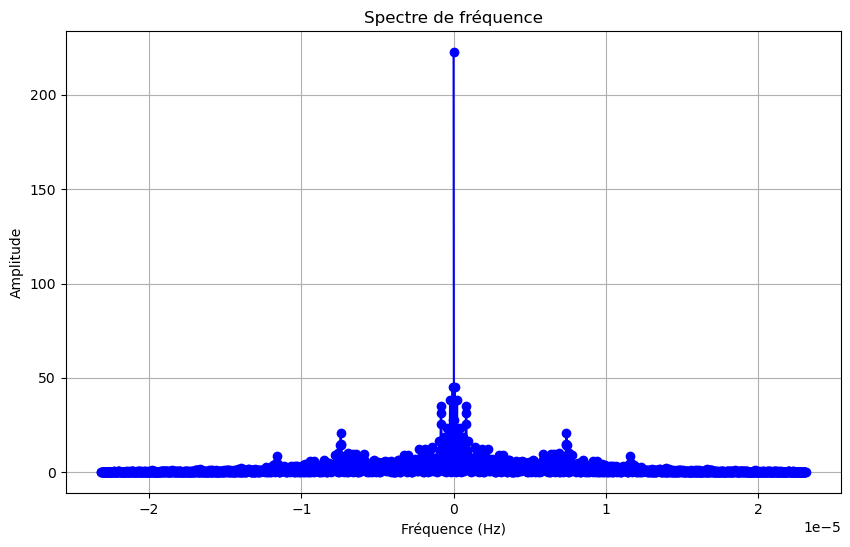

Période de la série temporelle: inf unités de temps


In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Supposons que 'df_extended' est votre DataFrame contenant les données de la série temporelle étendue avec effet miroir
# 'time' est la colonne représentant les temps et 've' est la colonne représentant les vitesses

# Calcul de la transformée de Fourier
N = len(df_1_extended)
dt = (df_1_extended['time'].iloc[1] - df_1_extended['time'].iloc[0]).total_seconds()  # Conversion en secondes
vitesse_fft = np.fft.fft(df_1_extended['ve'])
freq = np.fft.fftfreq(N, dt)  # Fréquences correspondantes

# Identification de la fréquence dominante (qui correspond à la période)
index_max = np.argmax(np.abs(vitesse_fft))

# Vérification si la fréquence dominante n'est pas égale à zéro
if freq[index_max] != 0:
    periode = 1 / np.abs(freq[index_max])
else:
    periode = np.inf  # Si la fréquence dominante est zéro, considérez la période comme infinie

# Affichage du spectre de fréquence
plt.figure(figsize=(10, 6))
plt.plot(freq, np.abs(vitesse_fft), color='blue', marker='o', linestyle='-')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectre de fréquence')
plt.grid(True)
plt.savefig("fig23 mode.png")
plt.show()

print("Période de la série temporelle: {:.2f} unités de temps".format(periode))

## Case of vn

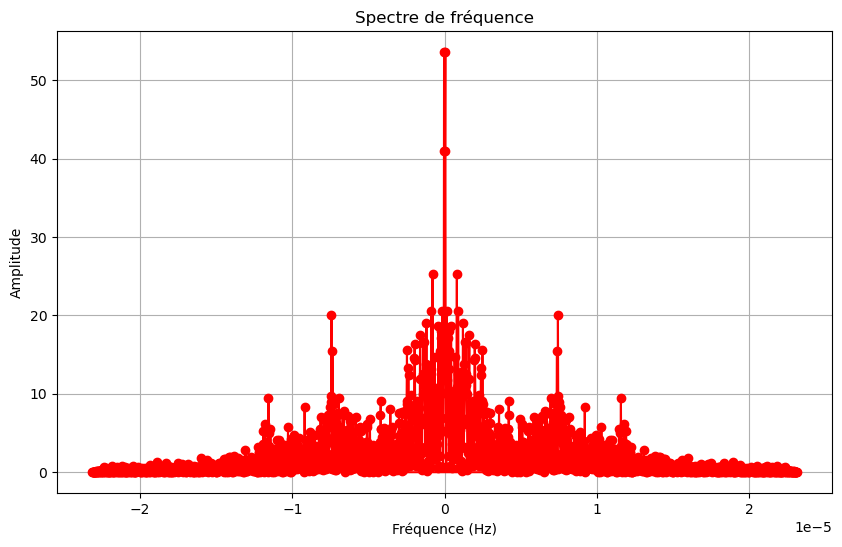

Période de la série temporelle: 23803200.00 unités de temps


In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Supposons que 'df_extended' est votre DataFrame contenant les données de la série temporelle étendue avec effet miroir
# 'time' est la colonne représentant les temps et 've' est la colonne représentant les vitesses

# Calcul de la transformée de Fourier
N = len(df_2_extended)
dt = (df_2_extended['time'].iloc[1] - df_2_extended['time'].iloc[0]).total_seconds()  # Conversion en secondes
vitesse_fft = np.fft.fft(df_2_extended['vn'])
freq = np.fft.fftfreq(N, dt)  # Fréquences correspondantes

# Identification de la fréquence dominante (qui correspond à la période)
index_max = np.argmax(np.abs(vitesse_fft))

# Vérification si la fréquence dominante n'est pas égale à zéro
if freq[index_max] != 0:
    periode = 1 / np.abs(freq[index_max])
else:
    periode = np.inf  # Si la fréquence dominante est zéro, considérez la période comme infinie

# Affichage du spectre de fréquence
plt.figure(figsize=(10, 6))
plt.plot(freq, np.abs(vitesse_fft), color='red', marker='o', linestyle='-')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectre de fréquence')
plt.grid(True)
plt.savefig("fig24 mode.png")
plt.show()

print("Période de la série temporelle: {:.2f} unités de temps".format(periode))

 ## Conclusion
   
 1. When the frequency of oscillation velocity collected by drifters is Close to or equal to zero, it suggests several conclusions, particularly in the context of oceanography or fluid dynamics where drifters are commonly used:
   - a. Ocean Currents or Fluid Motion: Drifters are often deployed to track the movement of ocean currents or fluid flows. A non-zero frequency of oscillation velocity indicates that the drifters are experiencing motion within the fluid, suggesting the presence of currents or turbulence.
   - b. Dynamic Environment: The presence of oscillation velocity signifies that the fluid environment is dynamic and constantly changing. This could be due to factors such as tides, winds, or interactions with other fluid masses.
   - c. Spatial Variability: Differences in the frequency of oscillation velocity among drifters can indicate spatial variability in the fluid dynamics. For example, areas with higher frequency oscillations may experience stronger currents or more turbulent conditions compared to areas with lower frequencies.
   - d. ransport and Mixing: Oscillating velocities can contribute to the transport and mixing of substances within the fluid. Understanding the frequency and patterns of oscillation velocity helps in modeling the dispersion of pollutants, nutrients, or marine organisms in the ocean or other fluid bodies.
   - e. Interaction with Boundaries: Oscillation velocity data can reveal information about interactions between the fluid and boundaries such as coastlines, underwater topography, or man-made structures like oil rigs or piers. These interactions can influence the flow patterns and dynamics of the fluid.

In summary, a non-zero frequency of oscillation velocity collected by drifters indicates the presence of fluid motion and provides valuable insights into the dynamics, transport processes, and spatial variability of the fluid environment being studied.

                           This situation can due to inertial wave?
                           
2. Absolutely, the situation where drifters experience oscillation velocities greater than zero could indeed be due to inertial waves. Inertial waves are a type of wave that occurs in rotating fluid systems, such as the Earth's oceans and atmosphere. Here's how inertial waves could be involved:
   - a. Coriolis Effect: Inertial waves are caused by the Coriolis effect, which arises due to the rotation of the Earth. As a result, when drifters move within a rotating fluid system like the ocean, they experience forces perpendicular to their velocity known as Coriolis forces.
   - b. Wave-like Motion: Inertial waves manifest as wave-like motions that propagate through the fluid. These waves can lead to oscillatory motions of fluid parcels, including the drifters.
   - c. Frequency of Oscillation: The frequency of inertial waves is directly related to the rotation rate of the Earth and the latitude at which the motion occurs. Inertial waves have frequencies proportional to the Coriolis parameter, which increases with latitude. Therefore, at higher latitudes, the frequency of oscillation velocities experienced by drifters due to inertial waves tends to be higher.
   - d. Spatial and Temporal Variability: Inertial waves contribute to the spatial and temporal variability of ocean currents and fluid motions. They can influence the dynamics of large-scale circulation patterns as well as smaller-scale turbulence and mixing processes.
   - e. Observational Signatures: Drifters deployed in rotating fluid systems often exhibit characteristic signatures of inertial waves, including oscillations with frequencies corresponding to the local Coriolis parameter and with spatial patterns determined by the fluid dynamics of the system.

In summary, inertial waves are a plausible explanation for the situation where drifters experience oscillation velocities greater than zero, especially in rotating fluid systems like the Earth's oceans. These waves play a significant role in shaping the dynamics and behavior of fluid motions in such environments.





# Previously, we have proven the existence of inertial waves, whether for ve and vn due to a frequency of the order of magnitude 10^-6, close to or equal to zero.
# Now, it would be judicious to proceed with a visualization of such waves in order to see the areas where these waves exhibit strong variations
# and the reasons behind them.

#  Case of ve

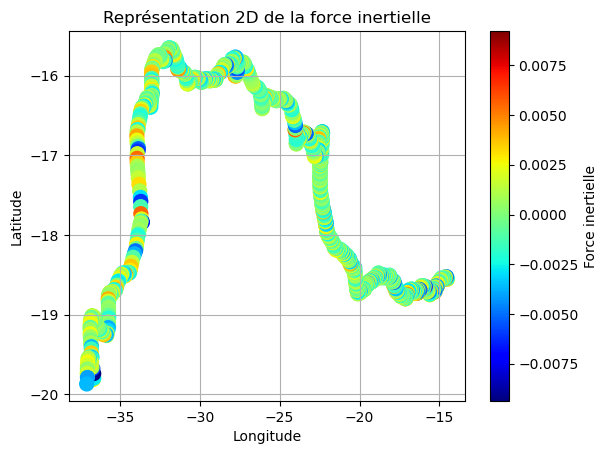

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# Création d'un exemple de dataframe
df_1=df[0:1102]

# Convertir la colonne temps en un format numérique représentant le temps écoulé (en secondes)
df_1['time'] = (df_1['time'] - df_1['time'].iloc[0]).dt.total_seconds()

# Calcul de l'accélération
df_1['acceleration'] = df_1['ve'].diff() / df_1['time'].diff()

# Masse (à titre d'exemple)
masse = 1000  # en kg

# Calcul de la force inertielle
df_1['force_inertielle'] = masse * df_1['acceleration']

# Tracer la force inertielle en 2D
plt.scatter(df_1['Longitude'], df_1['Latitude'], c=df_1['force_inertielle'], cmap='jet', s=100)
plt.colorbar(label='Force inertielle')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Représentation 2D de la force inertielle')
plt.grid(True)
plt.savefig("fig25 mode.png")
plt.show()

# In 3D

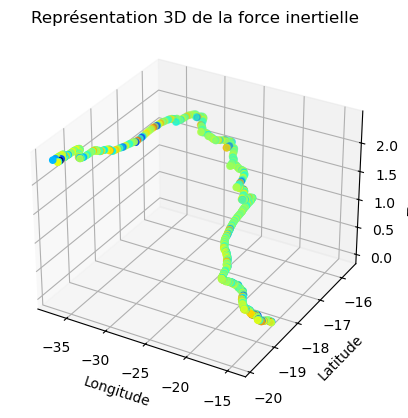

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Création d'un exemple de dataframe
df_1=df[0:1102]

# Convertir la colonne temps en un format numérique représentant le temps écoulé (en secondes)
df_1['time'] = (df_1['time'] - df_1['time'].iloc[0]).dt.total_seconds()

# Calcul de l'accélération
df_1['acceleration'] = df_1['ve'].diff() / df_1['time'].diff()

# Masse (à titre d'exemple)
masse = 1000  # en kg

# Calcul de la force inertielle
df_1['force_inertielle'] = masse * df_1['acceleration']

# Création d'une figure 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Tracer la force inertielle en fonction de la longitude, de la latitude et du temps
ax.scatter(df_1['Longitude'], df_1['Latitude'], df_1['time'], c=df_1['force_inertielle'], cmap='jet')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Temps (s)')
ax.set_title('Représentation 3D de la force inertielle')
plt.savefig("fig26 mode.png")
plt.show()

#  Case of vn

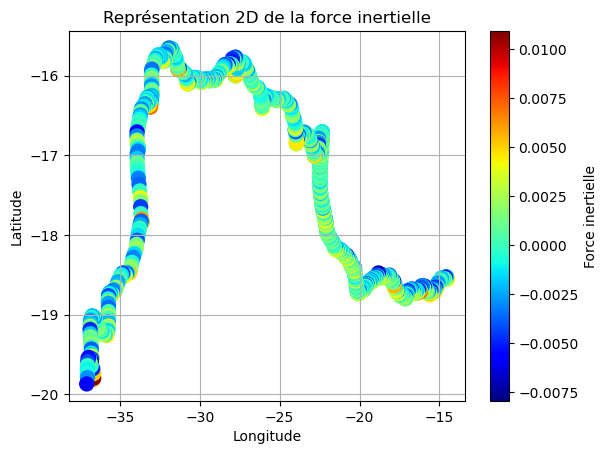

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# Création d'un exemple de dataframe
df_1=df[0:1102]

# Convertir la colonne temps en un format numérique représentant le temps écoulé (en secondes)
df_1['time'] = (df_1['time'] - df_1['time'].iloc[0]).dt.total_seconds()

# Calcul de l'accélération
df_1['acceleration'] = df_1['vn'].diff() / df_1['time'].diff()

# Masse (à titre d'exemple)
masse = 1000  # en kg

# Calcul de la force inertielle
df_1['force_inertielle'] = masse * df_1['acceleration']

# Tracer la force inertielle en 2D
plt.scatter(df_1['Longitude'], df_1['Latitude'], c=df_1['force_inertielle'], cmap='jet', s=100)
plt.colorbar(label='Force inertielle')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Représentation 2D de la force inertielle')
plt.grid(True)
plt.savefig("fig27 mode.png")
plt.show()

# In 3D

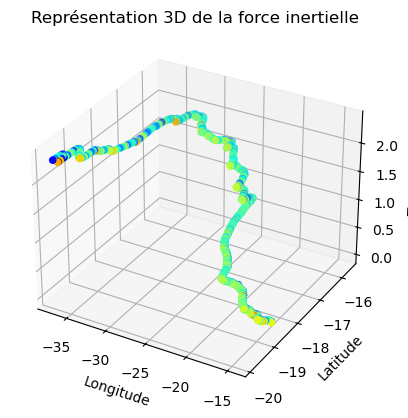

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Création d'un exemple de dataframe
df_1=df[0:1102]

# Convertir la colonne temps en un format numérique représentant le temps écoulé (en secondes)
df_1['time'] = (df_1['time'] - df_1['time'].iloc[0]).dt.total_seconds()

# Calcul de l'accélération
df_1['acceleration'] = df_1['vn'].diff() / df_1['time'].diff()

# Masse (à titre d'exemple)
masse = 1000  # en kg

# Calcul de la force inertielle
df_1['force_inertielle'] = masse * df_1['acceleration']

# Création d'une figure 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Tracer la force inertielle en fonction de la longitude, de la latitude et du temps
ax.scatter(df_1['Longitude'], df_1['Latitude'], df_1['time'], c=df_1['force_inertielle'], cmap='jet')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Temps (s)')
ax.set_title('Représentation 3D de la force inertielle')
plt.savefig("fig28 mode.png")
plt.show()